## Rendering for Knowledge Base and Corpus Methods

### Graphics

1. Evaluating effectiveness across languages and overal effectiveness.
 - Histogram comparison of accuracy scores for the 6 methods employed in English and Spanish.
2. Evaluating effectiveness for Self-Study:
 - Histogram comparison for pass/fail scores.
3. Deciding hypothesis on multiple model answers:
 - Histogram comparison for MA=3 scores.

In [24]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import libs.data as data
import libs.utils as utils
import libs.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from importlib import reload
%matplotlib inline
import seaborn as sns

In [9]:
df = data.load_dataframe('../../../datasets/final/en/asag_v2_en_filter.csv')
df.head(1)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [19]:
pass_fail_scores = df['Class2_Score'].as_matrix()
true_scores = np.round(df['Score'].as_matrix())

e1_shortest_path_res = data.load('../tmp/e1_exp_01')
e2_lch_res = data.load('../tmp/e2_exp_01')
e3_wp_res = data.load('../tmp/e3_exp_01')
e4_resnik_res = data.load('../tmp/e4_exp_01')
e5_jch_res = data.load('../tmp/e5_exp_01')
e6_lin_res = data.load('../tmp/e6_exp_01')

# Gather statistics from runs
e1_stats = stats.get_all_stats(true_scores, e1_shortest_path_res['y_pred'])
e1_stats['name'] = 'SP'
e1_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e1_shortest_path_res['y_pred']))
e1_stats_pf['name'] = 'SP'

e2_stats = stats.get_all_stats(true_scores, e2_lch_res['y_pred'])
e2_stats['name'] = 'LCH'
e2_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e2_lch_res['y_pred']))
e2_stats_pf['name'] = 'LCH'

e3_stats = stats.get_all_stats(true_scores, e3_wp_res['y_pred'])
e3_stats['name'] = 'WP'
e3_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e3_wp_res['y_pred']))
e3_stats_pf['name'] = 'WP'

e4_stats = stats.get_all_stats(true_scores, e4_resnik_res['y_pred'])
e4_stats['name'] = 'RES'
e4_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e4_resnik_res['y_pred']))
e4_stats_pf['name'] = 'RES'

e5_stats = stats.get_all_stats(true_scores, e5_jch_res['y_pred'])
e5_stats['name'] = 'JCH'
e5_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e5_jch_res['y_pred']))
e5_stats_pf['name'] = 'JCH'

e6_stats = stats.get_all_stats(true_scores, e6_lin_res['y_pred'])
e6_stats['name'] = 'LIN'
e6_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e6_lin_res['y_pred']))
e6_stats_pf['name'] = 'LIN'

In [58]:
df_columns = ['Name', 'Accuracy', 'Precision', 'Recall', 'F1', 'Kappa', 'MAE', 'R']
df_class6_data = [
    [e1_stats['name']] + e1_stats['apcf'] + [e1_stats['k'], e1_stats['mae'], e1_stats['r']],
    [e2_stats['name']] + e2_stats['apcf'] + [e2_stats['k'], e2_stats['mae'], e2_stats['r']],
    [e3_stats['name']] + e3_stats['apcf'] + [e3_stats['k'], e3_stats['mae'], e3_stats['r']],
    [e4_stats['name']] + e4_stats['apcf'] + [e4_stats['k'], e4_stats['mae'], e4_stats['r']],
    [e5_stats['name']] + e5_stats['apcf'] + [e5_stats['k'], e5_stats['mae'], e5_stats['r']],
    [e6_stats['name']] + e6_stats['apcf'] + [e6_stats['k'], e6_stats['mae'], e6_stats['r']],
]

df_class6 = pd.DataFrame(df_class6_data, columns=df_columns)
df_class6.to_csv('../tmp/exp_results_class6.csv', sep='~')

df_class2_data = [
    [e1_stats_pf['name']] + e1_stats_pf['apcf'] + [e1_stats_pf['k'], e1_stats_pf['mae'], e1_stats_pf['r']],
    [e2_stats_pf['name']] + e2_stats_pf['apcf'] + [e2_stats_pf['k'], e2_stats_pf['mae'], e2_stats_pf['r']],
    [e3_stats_pf['name']] + e3_stats_pf['apcf'] + [e3_stats_pf['k'], e3_stats_pf['mae'], e3_stats_pf['r']],
    [e4_stats_pf['name']] + e4_stats_pf['apcf'] + [e4_stats_pf['k'], e4_stats_pf['mae'], e4_stats_pf['r']],
    [e5_stats_pf['name']] + e5_stats_pf['apcf'] + [e5_stats_pf['k'], e5_stats_pf['mae'], e5_stats_pf['r']],
    [e6_stats_pf['name']] + e6_stats_pf['apcf'] + [e6_stats_pf['k'], e6_stats_pf['mae'], e6_stats_pf['r']],
]

df_class2 = pd.DataFrame(df_class2_data, columns=df_columns)
df_class2.to_csv('../tmp/exp_results_class2.csv', sep='~')

In [65]:
df_class6

Name  Accuracy  Precision    Recall        F1     Kappa       MAE         R
0   SP  0.131343   0.369103  0.131343  0.141026 -0.002993  1.623383  0.279500
1  LCH  0.180597   0.313317  0.180597  0.197947 -0.006505  1.046766  0.058439
2   WP  0.238806   0.320454  0.238806  0.260317 -0.016952  0.531343  0.127136
3  RES  0.156219   0.321675  0.156219  0.166608 -0.002133  1.319403  0.161241
4  JCH  0.121891   0.382515  0.121891  0.133094 -0.002537  1.765672  0.315017
5  LIN  0.164677   0.327110  0.164677  0.182713 -0.005289  1.207960  0.127078

### Rendering 001: Accuracy Scores across 6 grades

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


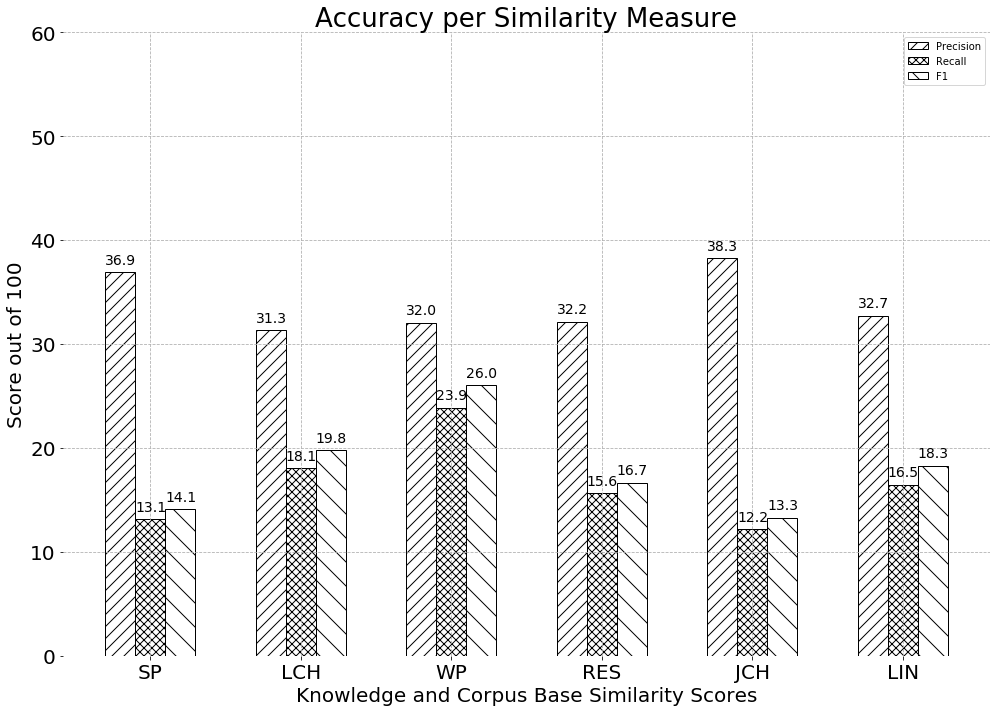

In [52]:
import libs.rendering as rr
reload(rr)
plt.rcParams["figure.figsize"] = (14, 10)
rr.render_accuracy_scores(df_class6, 
                          title={'title':'Accuracy per Similarity Measure', 'fontsize' : 26 },
                          xticks=df_class6['Name'],
                          axis_labels={'xlabel' : 'Knowledge and Corpus Base Similarity Scores', 'ylabel' : "Score out of 100", 'fontsize' : 20},
                          cols=['Precision', 'Recall', 'F1'],
                          number_info={'fontsize':14, 'xoffset': -0.1, 'yoffset' : 0.8},
                          savefile='../renderings/class6_accuracy_scores.png',
                          ylim=60)

### Rendering 002: Accuracy Scores for Pass/Fail

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


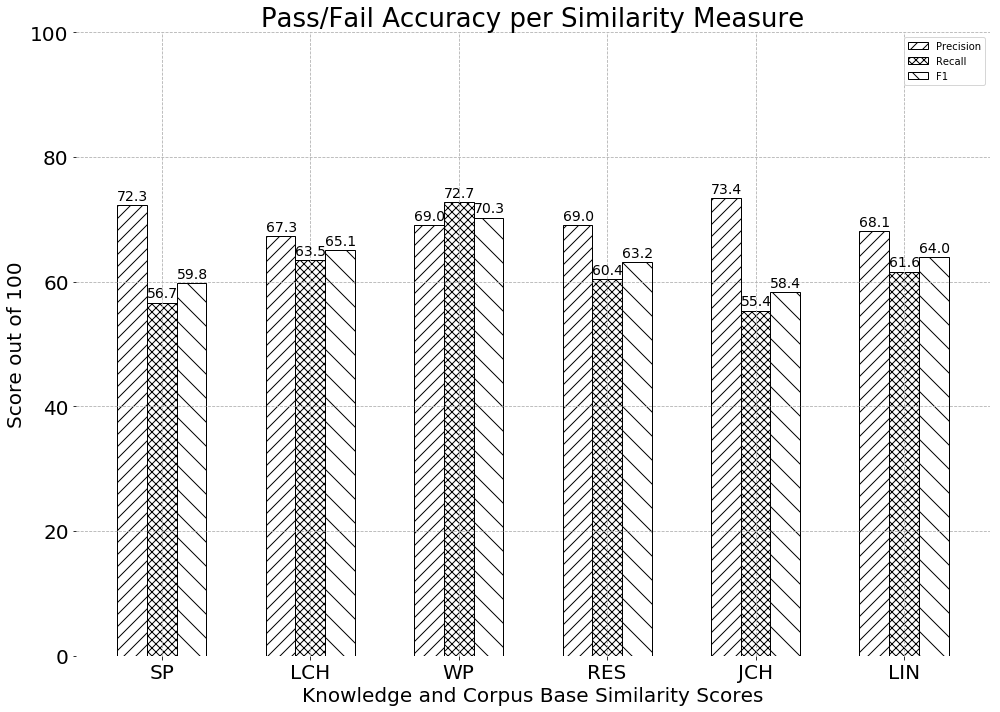

In [54]:
import libs.rendering as rr
reload(rr)
plt.rcParams["figure.figsize"] = (14, 10)
rr.render_accuracy_scores(df_class2, 
                          title={'title':'Pass/Fail Accuracy per Similarity Measure', 'fontsize' : 26 },
                          xticks=df_class6['Name'],
                          axis_labels={'xlabel' : 'Knowledge and Corpus Base Similarity Scores', 'ylabel' : "Score out of 100", 'fontsize' : 20},
                          cols=['Precision', 'Recall', 'F1'],
                          number_info={'fontsize':14, 'xoffset': -0.1, 'yoffset' : 0.8},
                          savefile='../renderings/class2_accuracy_scores.png',
                          ylim=100)

### Rendering 003: Accuracy Scores for Model Answers = 3

In [57]:
# Using 3 Model Answers
e1_sp_ma3 = data.load('../tmp/e1_exp_04')
e2_lch_ma3 = data.load('../tmp/e2_exp_02')
e3_wp_ma3 = data.load('../tmp/e3_exp_02')
e4_resnik_ma3 = data.load('../tmp/e4_exp_02')
e5_jch_ma3 = data.load('../tmp/e5_exp_02')
e6_lin_ma3 = data.load('../tmp/e6_exp_02')

# Gather statistics from runs
e1_stats_ma3 = stats.get_all_stats(true_scores, e1_sp_ma3['y_pred'])
e1_stats_ma3['name'] = 'SP'
e1_stats_ma3_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e1_sp_ma3['y_pred']))
e1_stats_ma3_pf['name'] = 'SP'

e2_stats_ma3 = stats.get_all_stats(true_scores, e2_lch_ma3['y_pred'])
e2_stats_ma3['name'] = 'LCH'
e2_stats_ma3_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e2_lch_ma3['y_pred']))
e2_stats_ma3_pf['name'] = 'LCH'

e3_stats_ma3 = stats.get_all_stats(true_scores, e3_wp_ma3['y_pred'])
e3_stats_ma3['name'] = 'WP'
e3_stats_ma3_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e3_wp_ma3['y_pred']))
e3_stats_ma3_pf['name'] = 'WP'

e4_stats_ma3 = stats.get_all_stats(true_scores, e4_resnik_ma3['y_pred'])
e4_stats_ma3['name'] = 'RES'
e4_stats_ma3_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e4_resnik_ma3['y_pred']))
e4_stats_ma3_pf['name'] = 'RES'

e5_stats_ma3 = stats.get_all_stats(true_scores, e5_jch_ma3['y_pred'])
e5_stats_ma3['name'] = 'JCH'
e5_stats_ma3_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e5_jch_ma3['y_pred']))
e5_stats_ma3_pf['name'] = 'JCH'

e6_stats_ma3 = stats.get_all_stats(true_scores, e6_lin_ma3['y_pred'])
e6_stats_ma3['name'] = 'LIN'
e6_stats_ma3_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e6_lin_ma3['y_pred']))
e6_stats_ma3_pf['name'] = 'LIN'

In [59]:
df_class6_data_ma3 = [
    [e1_stats_ma3['name']] + e1_stats_ma3['apcf'] + [e1_stats_ma3['k'], e1_stats_ma3['mae'], e1_stats_ma3['r']],
    [e2_stats_ma3['name']] + e2_stats_ma3['apcf'] + [e2_stats_ma3['k'], e2_stats_ma3['mae'], e2_stats_ma3['r']],
    [e3_stats_ma3['name']] + e3_stats_ma3['apcf'] + [e3_stats_ma3['k'], e3_stats_ma3['mae'], e3_stats_ma3['r']],
    [e4_stats_ma3['name']] + e4_stats_ma3['apcf'] + [e4_stats_ma3['k'], e4_stats_ma3['mae'], e4_stats_ma3['r']],
    [e5_stats_ma3['name']] + e5_stats_ma3['apcf'] + [e5_stats_ma3['k'], e5_stats_ma3['mae'], e5_stats_ma3['r']],
    [e6_stats_ma3['name']] + e6_stats_ma3['apcf'] + [e6_stats_ma3['k'], e6_stats_ma3['mae'], e6_stats_ma3['r']],
]

df_class6_ma3 = pd.DataFrame(df_class6_data_ma3, columns=df_columns)
df_class6_ma3.to_csv('../tmp/exp_results_class6_ma3.csv', sep='~')

df_class2_data_ma3 = [
    [e1_stats_ma3_pf['name']] + e1_stats_ma3_pf['apcf'] + [e1_stats_ma3_pf['k'], e1_stats_ma3_pf['mae'], e1_stats_ma3_pf['r']],
    [e2_stats_ma3_pf['name']] + e2_stats_ma3_pf['apcf'] + [e2_stats_ma3_pf['k'], e2_stats_ma3_pf['mae'], e2_stats_ma3_pf['r']],
    [e3_stats_ma3_pf['name']] + e3_stats_ma3_pf['apcf'] + [e3_stats_ma3_pf['k'], e3_stats_ma3_pf['mae'], e3_stats_ma3_pf['r']],
    [e4_stats_ma3_pf['name']] + e4_stats_ma3_pf['apcf'] + [e4_stats_ma3_pf['k'], e4_stats_ma3_pf['mae'], e4_stats_ma3_pf['r']],
    [e5_stats_ma3_pf['name']] + e5_stats_ma3_pf['apcf'] + [e5_stats_ma3_pf['k'], e5_stats_ma3_pf['mae'], e5_stats_ma3_pf['r']],
    [e6_stats_ma3_pf['name']] + e6_stats_ma3_pf['apcf'] + [e6_stats_ma3_pf['k'], e6_stats_ma3_pf['mae'], e6_stats_ma3_pf['r']],
]

df_class2_ma3 = pd.DataFrame(df_class2_data_ma3, columns=df_columns)
df_class2_ma3.to_csv('../tmp/exp_results_class2_ma3.csv', sep='~')

In [64]:
df_class2_ma3

Name  Accuracy  Precision    Recall        F1     Kappa       MAE         R
0   SP  0.688557   0.731498  0.688557  0.704244  0.244394  0.095522  0.251234
1  LCH  0.722886   0.681727  0.722886  0.695573  0.109021 -0.097015  0.114746
2   WP  0.761194   0.706238  0.761194  0.695314  0.090842 -0.189055  0.130853
3  RES  0.696517   0.692998  0.696517  0.694717  0.151832 -0.007960  0.151869
4  JCH  0.674129   0.738066  0.674129  0.694533  0.248923  0.136816  0.262306
5  LIN  0.705970   0.687060  0.705970  0.695274  0.133298 -0.043284  0.134397

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


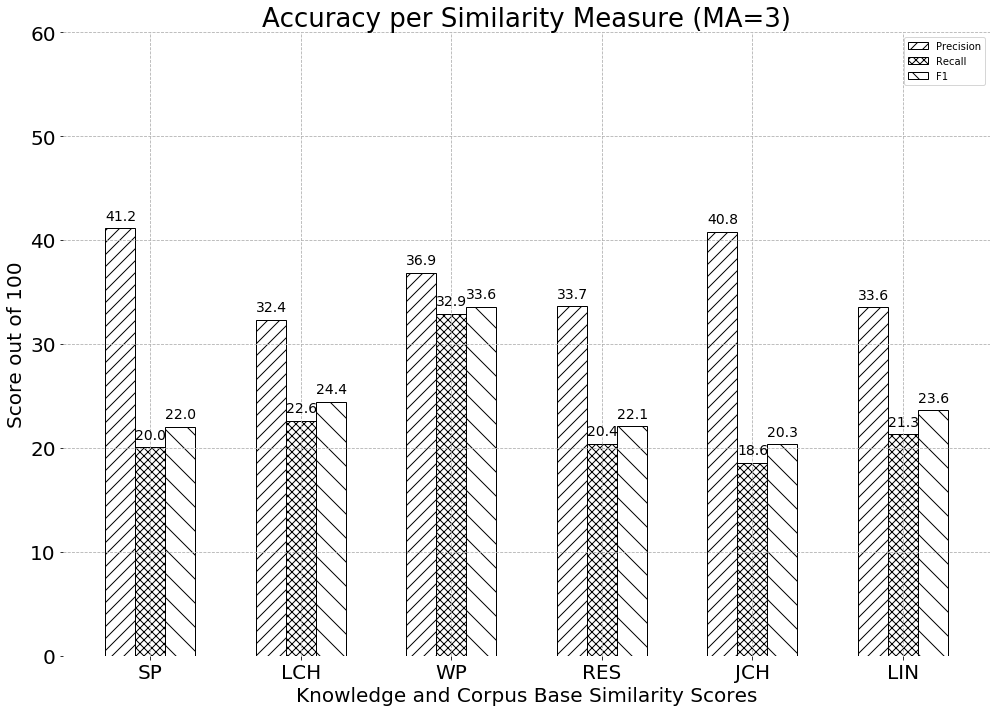

In [62]:
rr.render_accuracy_scores(df_class6_ma3, 
                          title={'title':'Accuracy per Similarity Measure (MA=3)', 'fontsize' : 26 },
                          xticks=df_class6_ma3['Name'],
                          axis_labels={'xlabel' : 'Knowledge and Corpus Base Similarity Scores', 'ylabel' : "Score out of 100", 'fontsize' : 20},
                          cols=['Precision', 'Recall', 'F1'],
                          number_info={'fontsize':14, 'xoffset': -0.1, 'yoffset' : 0.8},
                          savefile='../renderings/class6_accuracy_scores_ma3.png',
                          ylim=60)

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


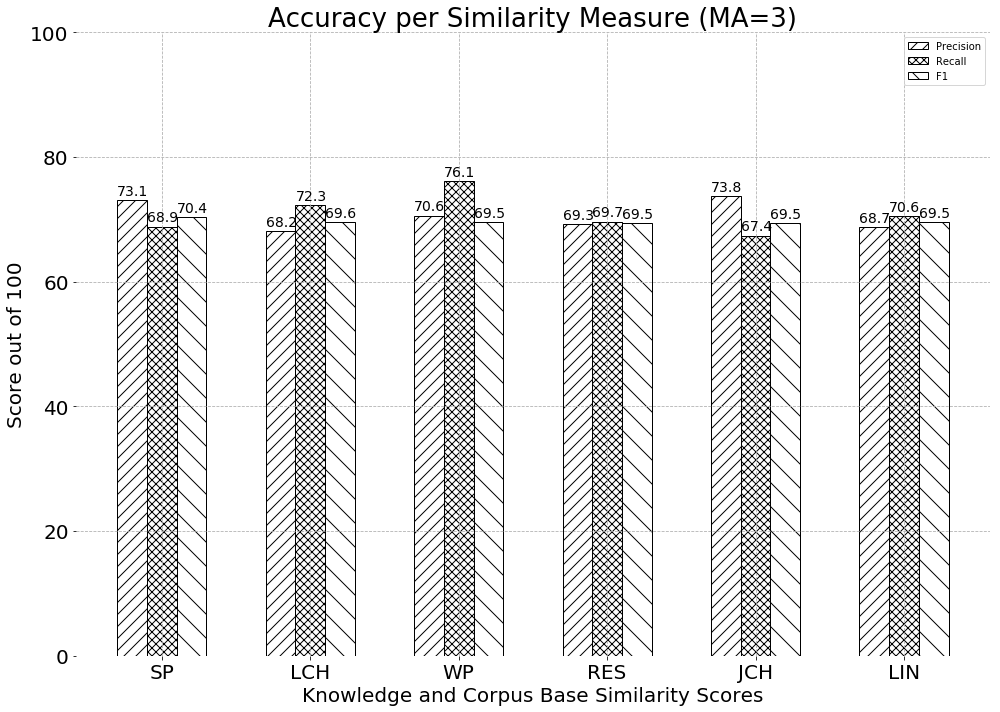

In [63]:
rr.render_accuracy_scores(df_class2_ma3, 
                          title={'title':'Accuracy per Similarity Measure (MA=3)', 'fontsize' : 26 },
                          xticks=df_class2_ma3['Name'],
                          axis_labels={'xlabel' : 'Knowledge and Corpus Base Similarity Scores', 'ylabel' : "Score out of 100", 'fontsize' : 20},
                          cols=['Precision', 'Recall', 'F1'],
                          number_info={'fontsize':14, 'xoffset': -0.1, 'yoffset' : 0.8},
                          savefile='../renderings/class2_accuracy_scores_ma3.png',
                          ylim=100)